<a href="https://colab.research.google.com/github/rrlamb/PredictiveModelForHousingPrices/blob/main/PredictiveModelForHousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/area_house_data.csv")

Looks at the head and info. Also plotted all info in a scatter plot. Created a correlation matrix to see how the data relates to price

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

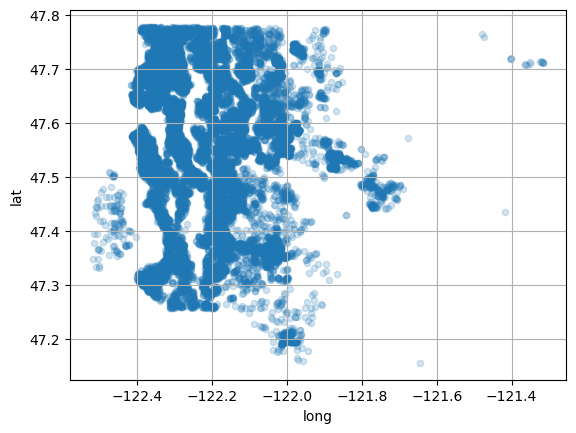

In [ ]:
df.plot(kind="scatter", x="long", y="lat", grid=True, alpha=0.2)
plt.show()

In [ ]:
corr_df = df.drop("date", axis=1)
corr_matrix = corr_df.corr()

In [ ]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

### Cleanup Data

No data is null so the only clean up done is removing the duplicate values

In [ ]:
df = df.drop_duplicates(subset=df.columns.difference(['id']), keep='first')

### Data Analysis :
Perform data analysis to show the interrelationships between some of the features that seem important to the value of the home

array([[<Axes: xlabel='zipcode', ylabel='zipcode'>,
        <Axes: xlabel='price', ylabel='zipcode'>,
        <Axes: xlabel='sqft_living', ylabel='zipcode'>,
        <Axes: xlabel='sqft_lot', ylabel='zipcode'>,
        <Axes: xlabel='grade', ylabel='zipcode'>],
       [<Axes: xlabel='zipcode', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='sqft_lot', ylabel='price'>,
        <Axes: xlabel='grade', ylabel='price'>],
       [<Axes: xlabel='zipcode', ylabel='sqft_living'>,
        <Axes: xlabel='price', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_lot', ylabel='sqft_living'>,
        <Axes: xlabel='grade', ylabel='sqft_living'>],
       [<Axes: xlabel='zipcode', ylabel='sqft_lot'>,
        <Axes: xlabel='price', ylabel='sqft_lot'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_lot'>,
        <Axes: xlabel='sqft_lot', ylabel='s

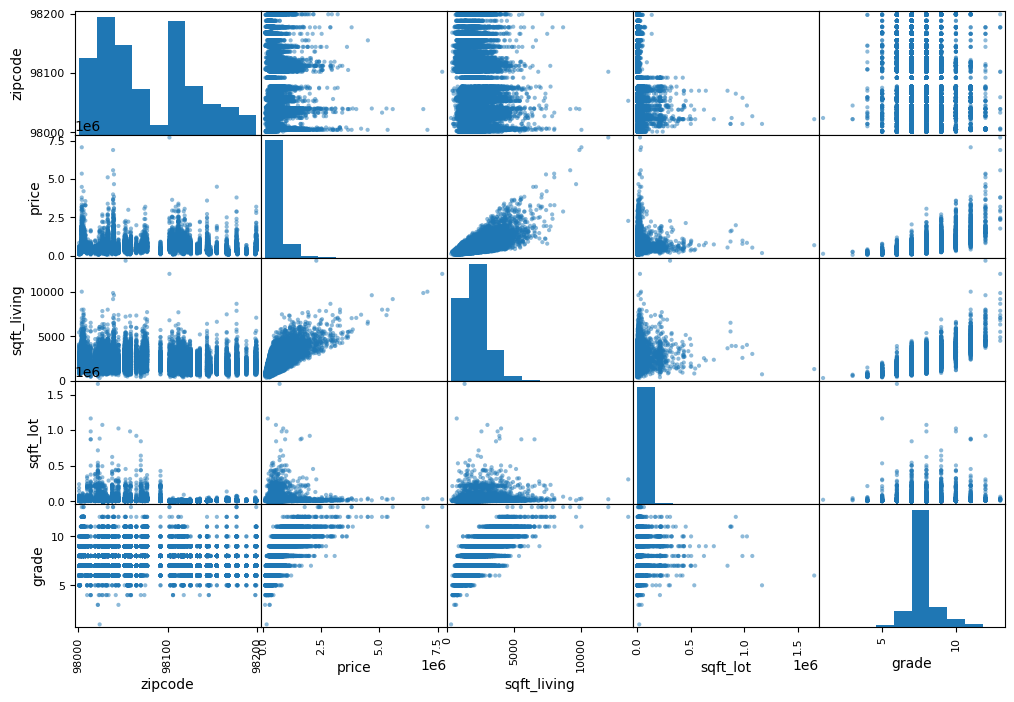

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["zipcode", "price",
"sqft_living", "sqft_lot", "grade"]
scatter_matrix(df[attributes], figsize=(12, 8))

### Data Engineering

Dropped some of the columns that have data thats unrelated to making the machine predict properly. Below are my reasons for droping them

- id: not needed to determine value
- data: again not important to determine the value of the house
- grade: made by some one who is biased
- waterfront: did not have a strong correlation to price
- view: did not have a strong correlation to price
- sqft_above/sqft_below: does not matter if you have the sqft of the whole house
- lat/long: if you have the zipcode you dont need to know the exact location of the home


In [ ]:
df = df.drop("id", axis=1)
df = df.drop("date", axis=1)
df = df.drop("grade", axis=1)
df = df.drop("waterfront", axis=1)
df = df.drop("view", axis=1)
df = df.drop("sqft_above", axis=1)
df = df.drop("sqft_basement", axis=1)
df = df.drop("lat", axis=1)
df = df.drop("long", axis=1)

Create some new columns with new data. Specfically show the difference between sqft of living space and lot currently and in 2015. Then dropped the data from 2015

In [ ]:
df["new_sqft_living"] = df["sqft_living"]-df["sqft_living15"]
df["new_sqft_lot"] = df["sqft_lot"]-df["sqft_lot15"]
df = df.drop("sqft_living15", axis=1)
df = df.drop("sqft_lot15", axis=1)

Confirm that the columns dropped

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,yr_renovated,zipcode,new_sqft_living,new_sqft_lot
0,221900.0,3,1.00,1180,5650,1.0,3,1955,0,98178,-160,0
1,538000.0,3,2.25,2570,7242,2.0,3,1951,1991,98125,880,-397
2,180000.0,2,1.00,770,10000,1.0,3,1933,0,98028,-1950,1938
3,604000.0,4,3.00,1960,5000,1.0,5,1965,0,98136,600,0
4,510000.0,3,2.00,1680,8080,1.0,3,1987,0,98074,-120,577


### Train and Test Dataset

Making a test and training data set. Then slippting those into price and all other variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_target = train_set["price"]
train_other = train_set.drop("price", axis=1)

test_target = test_set["price"]
test_other = test_set.drop("price", axis=1)


Making sure the data structure split properly

In [ ]:
test_target.head()

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
Name: price, dtype: float64

In [ ]:
train_set.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,yr_renovated,zipcode,new_sqft_living,new_sqft_lot
6325,325000.0,3,1.75,1780,13095,1.0,4,1983,0,98042,-970,0
13473,257000.0,2,1.00,1000,3700,1.0,3,1929,0,98118,-270,-1300
17614,228500.0,3,1.00,1080,7486,1.5,3,1942,0,98146,-90,-314
16970,288000.0,3,2.25,2090,7500,1.0,4,1977,0,98031,290,150
20868,479000.0,2,2.50,1741,1439,2.0,3,2007,0,98034,-349,-9015


Create the model for linear regresssion

In [ ]:
model = LinearRegression()
model.fit(train_other, train_target)

LinearRegression()

train the model off of the test set

In [ ]:
train_predictions = model.predict(train_other)
print("predictions:")
print(train_predictions[:5])
print("actual:")
train_target.iloc[:5].values

predictions:
[473660.8952173  323093.93610295 261135.75866356 514191.44042432
 473280.72107019]
actual:


array([325000., 257000., 228500., 288000., 479000.])

Print the mean squared error based on the training data

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(train_target, train_predictions, squared=False)
print(lin_rmse)

236010.31009505072


Use the trained model to get prediction for the test data

In [ ]:
test_predictions = model.predict(test_other)
print("predictions")
print(test_predictions[:5])
print("actual")
test_target.iloc[:5].values

predictions
[ 534994.70758415  736536.38489457 1024472.14346436 1410581.89660401
  641163.31799821]
actual


array([ 365000.,  865000., 1038000., 1490000.,  711000.])

Print the mea squared error based on the test data

In [ ]:
lin_rmse = mean_squared_error(test_target, test_predictions, squared=False)
print(lin_rmse)

256276.3290507098


The difference between the testing and training results are quite similar for most runs. This means that the model is consistent across the data sets. If I did this again I might standardize the price to get a smaller number when looking at the percent error. I might also change the data I get rid of versus keep to see how it effects the result. Lastly I would change the model being used to somehting more accurate.